Для 1 лаб работы по CV необходимо реализовать базовый минимум операций над изображениями
Входное изображение в формате (RGB, не чёрно-белое)
1. Фильтры

1.1 Медианный фильтр

1.2 Фильтр гаусса
2. Морфологические операции

2.1 Эрозия

2.2 Дилатация

3. Прочие операции

3.1 пороговая бинаризация (для rgb и grayscale изображения)

3.2 выравнивание гистограммы

3.3 поворот изображений на угол кратный 90 градусов


In [41]:
#%matplotlib inline

In [1]:
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

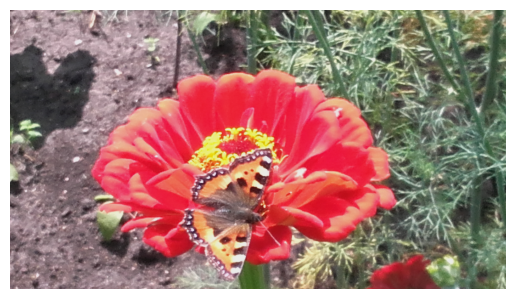

In [2]:
image1 = mpimg.imread('../Sourse_Images/butterfly_on_a_flower.jpg')
plt.imshow(image1)
plt.axis('off')  # скрыть оси
plt.show()

In [3]:
type(image1)

numpy.ndarray

In [4]:
print(f"Размер: {image1.shape}")
print(f"Тип данных: {image1.dtype}")

Размер: (1836, 3264, 3)
Тип данных: uint8


# 1. Фильтры

## 1.1 Медианный фильтр

Для 1 лаб работы по CV необходимо реализовать базовый минимум операций над изображениями
Входное изображение в формате (RGB, не чёрно-белое)
1. Фильтры

1.1 Медианный фильтр

1.2 Фильтр гаусса
2. Морфологические операции

2.1 Эрозия

2.2 Дилатация

3. Прочие операции

3.1 пороговая бинаризация (для rgb и grayscale изображения)

3.2 выравнивание гистограммы

3.3 поворот изображений на угол кратный 90 градусов


3.3 Поворот изображения на угол кратный 90&deg;

In [30]:
def Rotate(image: np.ndarray, angle: int) -> np.ndarray:
    H = image.shape[0]
    W = image.shape[1]
    C = image.shape[2]
    angle = angle % 360
    if(angle == 0):
        res_image = image.copy()
    elif(angle == 90):
        res_image = np.zeros((W, H, C)) # dtype=image.dtype)
        for k in range(C):
            for i in range(W):
                for j in range(H):
                    res_image[i][j][k] = image[j][i][k]
    elif(angle == 180):
        res_image = np.zeros((H, W, C)) # dtype=image.dtype)
        for k in range(C):
            for i in range(H):
                for j in range(W):
                    res_image[i][j][k] = image[H-1-i][W-1-j][k]
    elif(angle == 270):
        
        res_image = np.zeros((W, H, C)) # dtype=image.dtype)
        for k in range(C):
            for i in range(W):
                for j in range(H):                               
                    res_image[i][j][k] = image[H-1-j][i][k]
    else:
        ####Error
        res_image = np.zeros((H, W, C))
    
    return res_image.astype(np.uint8)


In [26]:
image2 = Rotate(image1, 180)

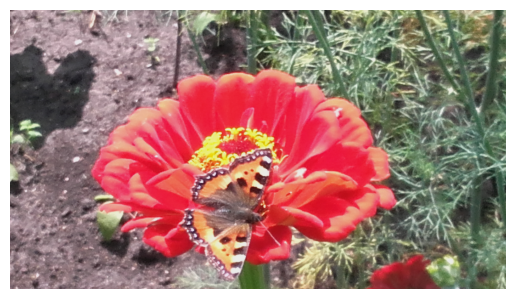

In [29]:
plt.imshow(image1) #plt.imshow(image1)
#plt.imshow(image2) #plt.imshow(image1)
plt.axis('off')  # скрыть оси
plt.show()

In [31]:
rotated_image = []
for i in [0, 90, 180, 270]:
    rotated_image.append(Rotate(image1, i))

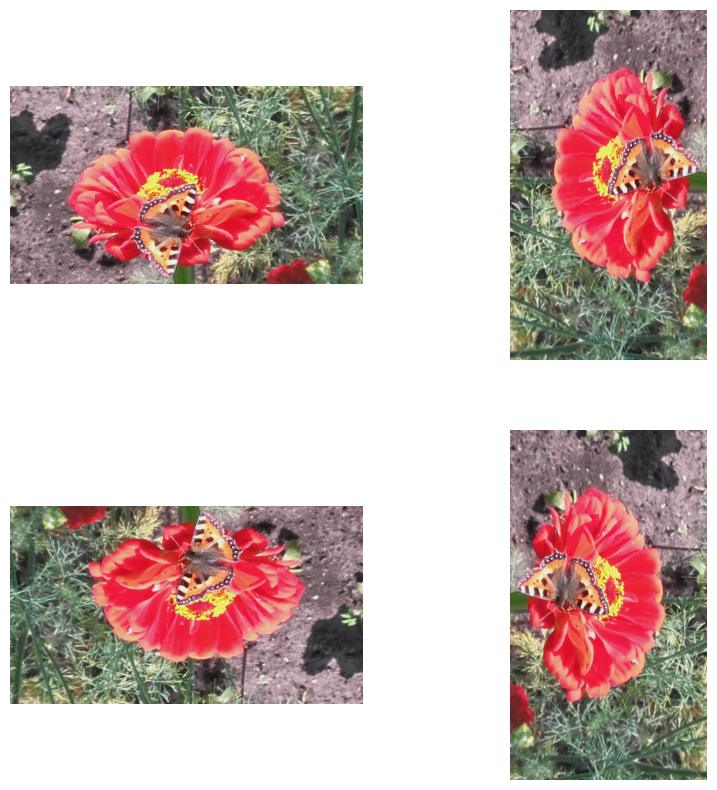

In [40]:
H = 2
W = 2
fig, ax = plt.subplots(H, W, figsize=(10,10))
for i in range(H*W):
    h = i // H
    w = i % W
    ax[h, w].imshow(rotated_image[i])
    ax[h, w].axis('off')
plt.show()

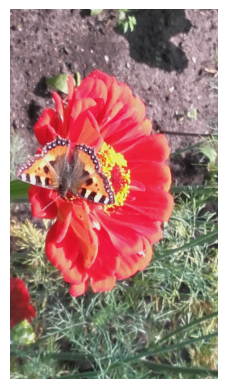

In [12]:
plt.imshow(img2)
plt.axis('off')  # скрыть оси
plt.show()

357

In [ ]:
#cv2.imwrite('output.jpg', image)